In [1]:
import os
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
experiments_path = os.getcwd() + "/../data/complex-training/"

In [3]:
# Figure layout
custom_params = {
    "axes.spines.right": True,
    "axes.spines.top": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "text.usetex": False,
    "text.latex.preamble": r"\usepackage[T1]{fontenc}",
}
sns.set_theme(style="ticks", rc=custom_params)

column_width = 3.25
aspect_ratio = 16 / 8
height = column_width / aspect_ratio

In [4]:
# Load ComplEx train / validation loss - Kelpie hyperparameters
with open(experiments_path + "train_loss_complex_kelpie.pkl", "rb") as handle:
    train_loss = pkl.load(handle)
with open(experiments_path + "valid_loss_complex_kelpie.pkl", "rb") as handle:
    valid_loss = pkl.load(handle)

# Load ComplEx train / validation loss - new hyperparameters
with open(experiments_path + "train_loss_complex_retrained.pkl", "rb") as handle:
    train_loss_ours = pkl.load(handle)
with open(experiments_path + "valid_loss_complex_retrained.pkl", "rb") as handle:
    valid_loss_ours = pkl.load(handle)

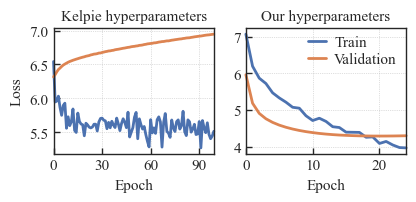

In [5]:
# Plot train / validation loss
fig, ax = plt.subplots(1, 2, figsize=(1.4 * column_width, height))

ax[0].plot(train_loss, lw=2, clip_on=False, color="C0")
ax[0].plot(valid_loss, lw=2, clip_on=False, color="C1")

ax[1].plot(train_loss_ours, lw=2, label="Train", clip_on=False, color="C0")
ax[1].plot(valid_loss_ours, lw=2, label="Validation", clip_on=False, color="C1")

plt.legend(
    frameon=False,
    labelspacing=0.2,
    handlelength=1.2,
    handletextpad=0.5,
    loc=(0.35, 0.65),
)

ax[0].set_xticks([0, 30, 60, 90])
ax[0].set_xlim(0, 99)
ax[1].set_xlim(0, 24)
ax[0].set_ylabel("Loss", size=11)
ax[0].set_xlabel("Epoch", size=11)
ax[1].set_xlabel("Epoch", size=11)
ax[0].set_title("Kelpie hyperparameters", size=11)
ax[1].set_title("Our hyperparameters", size=11)

for a in ax:
    a.tick_params(axis="both", width=1, direction="in", length=4)

    for spine in a.spines.values():
        spine.set_linewidth(1)

    a.grid(
        True, which="both", axis="both", color="silver", linestyle=":", linewidth=0.5
    )

plt.savefig("../figures/complex-training.pdf", bbox_inches="tight", pad_inches=0)

plt.show()

### ComplEx performance

#### New hyperparameters
- Validation Hits@1: 0.233476
- Validation Hits@10: 0.484289
- Validation MRR: 0.316474
- Test Hits@1: 0.227402
- Test Hits@10: 0.478183
- Test MRR: 0.311068

#### Kelpie hyperparameters
- Validation Hits@1: 0.274850
- Validation Hits@10: 0.561078
- Validation MRR: 0.370046
- Test Hits@1: 0.270595
- Test Hits@10: 0.557779
- Test MRR: 0.365247